In [26]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from utils import *
from matplotlib.ticker import ScalarFormatter

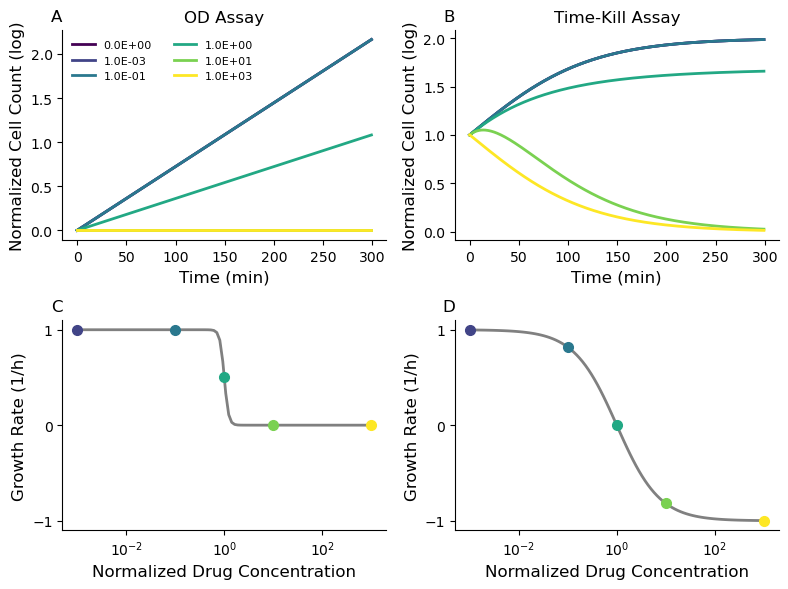

In [30]:
cmap = cm.get_cmap('viridis')
conc_list = [0,10**-3,10**-1,10**0,10**1,10**3]
num_conc = len(conc_list)

gmax = 1
gmin = 0

ic50 = 1 
hc = 10

conc = np.logspace(-3, 3, 100)

gr = hill_fn(conc, gmax, gmin, hc, ic50)

fig,ax_list = plt.subplots(ncols=2,nrows=2,figsize=(8,6))

##########################################################################################
ax = ax_list[1,0]

ax.plot(conc, gr, color='gray',linewidth=2)

ax.set_ylim((-1.1,1.1))

ax.set_xscale('log')

indx = 0
for c in conc_list:
    # get the growth rate
    gr = hill_fn(c, gmax, gmin, hc, ic50)

    ax.plot(c, gr, 'o', color=cmap(indx/(num_conc-1)), markersize=7)
    indx += 1

ax.set_yticks([1,0,-1])

ax.set_ylabel('Growth Rate (1/h)',fontsize=12)
ax.set_xlabel('Normalized Drug Concentration',fontsize=12)

##########################################################################################
gmin = -1
hc = 1

gr = hill_fn(conc, gmax, gmin, hc, ic50)

ax = ax_list[1,1]

ax.plot(conc, gr, color='gray',linewidth=2)
ax.set_xscale('log')

indx = 0
for c in conc_list:
    # get the growth rate
    gr = hill_fn(c, gmax, gmin, hc, ic50)

    ax.plot(c, gr, 'o', color=cmap(indx/(num_conc-1)), markersize=7)
    indx += 1

ax.set_yticks([1,0,-1])

ax.set_ylabel('Growth Rate (1/h)',fontsize=12)
ax.set_xlabel('Normalized Drug Concentration',fontsize=12)

##########################################################################################
cmap = cm.get_cmap('viridis')

gmin = 0
hc = 10

t = np.arange(0,300,1)

ax = ax_list[0,0]

indx = 0

conc_list = [0,10**-3,10**-1,10**0,10**1,10**3]
num_conc = len(conc_list)

for c in conc_list:
    # get the growth rate
    gr = hill_fn(c, gmax, gmin, hc, ic50)/60 # per minute

    # get cell count over time
    y = cell_count_vs_time(t,0,gr,0,1)

    ax.plot(t,y,linewidth=2,color=cmap(indx/(num_conc-1)),label='%.1E' % c)
    indx += 1

ax.set_ylabel('Normalized Cell Count (log)',fontsize=12)
ax.set_xlabel('Time (min)',fontsize=12)

ax.set_title('OD Assay')

##########################################################################################
gmin = -1

ax = ax_list[0,1]

indx = 0

conc_list = [0,10**-3,10**-1,10**0,10**1,10**3]
num_conc = len(conc_list)

alpha_list = [10**-6,10**-3,10**-3,10**-2,0.05,10]

for c in conc_list:
    # get the net growth rate
    gr = hill_fn(c, gmax, gmin, hc, ic50)/60 # per minute

    r_d = gmax/60 - gr # death rate
    # def growth_sol(t,y0,K,Kss,alpha,beta,cc):
    #     y = odeint(growth_diffeq,y0,t,args=(K,Kss,alpha,beta,cc))
    #     return y[:,0]
    y = growth_sol(t,1,1/60,r_d,alpha_list[indx],2)
    # y = y - y[0]
    # format label as scientific notation
    ax.plot(t,y,linewidth=2,color=cmap(indx/(num_conc-1)),label=c)
    indx += 1

ax.set_ylabel('Normalized Cell Count (log)',fontsize=12)
ax.set_xlabel('Time (min)',fontsize=12)

ax.set_title('Time-Kill Assay')

# label the axes

labels = ['A','B','C','D']

for ax in ax_list.flatten():
    ax.text(0, 1.1, labels.pop(0), transform=ax.transAxes,
      fontsize=12, va='top', ha='right')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax_list[0,0].legend(fontsize=8,frameon=False,ncol=2)

fig.tight_layout()

fig.savefig('figures/cartoon.pdf',bbox_inches='tight')